Link to data: https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e (** this file maybe too big for github, please not that when downloading the data it is filtered for only entries for fiscal year 2018**)

This is a dataset from the Office of Payroll Administration (OPA). In a csv format, it gives the name, department, title, and pay (both regular and overtime) for city employees for NYC (which accounts for most of the major public service departments). It is payroll data for the fiscal end of 2018 and was last updates 9/28/18. This data has been public since 2015. Though it does not say, this data is most likely kept and stored as public record by the OPA, which processes and delivers payroll to the 300k+ city employees.

Growing up in NYC, with what seems like a tremendous amount of public services, I believe that this data set will allow me to learn a bit more about how the city operates. More specifically, it may help me appreciate some services over others. With this dataset, I hope to see where the city is putting its money and manpower, which payroll seems to be a good indicator of. Using this dataset, we can see what is important and, in a sense, most valuable to the city. In addition, we may also be able to see if any dept seems to be over- or underpaid.

A few questions I hope to answer:

What are the average salary per hour by department (top 10) and what has the most total payroll?
What are the average number of hours (regular and overtime) worked for each department (top 10)?
Which departments have the most manpower (top 10) and where is that manpower mainly concentrated (top 10)?

Fields:

- Fiscal year: the reporting year (integer)
- Payroll number: an identifier for the dept (integer)
- Agency name: the department for the individual employee (string)
- Last Name (string)
- First Name (string)
- Mid Initial (character)
- Agency Start - when did the employee start working (string)
- Work Location - where does the employee work (string)
- Title Description - what is the employees job (string)
- Leave Status - is the employee still working there (string)
- Base Salary (float)
- Pay Basis - is the base salary per hour, per year, etc. (string)
- Regular Hours - hours before overtime accounted for (float)
- Regular Gross Paid - actual amount paid (float)
- OT Hours - overtime hours for employee (float)
- Total OT Paid - amount for overtime paid, which surprisingly can be negative (float)
- Total Other Pay (float)

Problems and potential transformations:

For the most part, this data is very clean and standardized, but it is tough to see problems given that there are 500k+ rows. Probably the biggest, which will need to be solved, is that some locations are missing and will need to filled in. Not only that, but the pay basis is different. I believe we should only consider full time employees on a per annum basis. Many of the per hour and per day employees are for one off jobs or just work part time from just reading the data. Again, this should allow for normalization. Moreover, many of the employees are not "active", meaning ceased or on leave, which I would like to take out to be consistent (also some of the employees are interns and such). I will also remove some columns (specifically fiscal year, middle initial, and agency start) that are irrelevant to my analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
payroll = pd.read_csv("Citywide_Payroll_Data__Fiscal_Year_.csv")

Here is a look at the raw data before cleaning or transforming

In [3]:
payroll

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2018,56,POLICE DEPARTMENT,KYLE,ROBERT,S,07/01/1998,MANHATTAN,POLICE OFFICER,CEASED,85292.00,per Annum,1034.28,43697.19,0.00,-563.90,11083.10
1,2018,56,POLICE DEPARTMENT,DONZO,MOHAMMED,B,07/06/2010,MANHATTAN,POLICE OFFICER,CEASED,85292.00,per Annum,1314.28,55147.19,0.00,-537.22,13143.56
2,2018,56,POLICE DEPARTMENT,INFANZON,GRETCHEN,NaN,07/11/2012,MANHATTAN,POLICE OFFICER,ON LEAVE,85292.00,per Annum,1742.87,60527.31,0.00,-537.10,8980.93
3,2018,56,POLICE DEPARTMENT,LYNCH,ALTONIA,B,05/16/2014,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,881.00,14608.63,0.00,-166.47,213.00
4,2018,56,POLICE DEPARTMENT,MANIGO,BEATRICE,NaN,08/26/2002,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,1017.67,16792.29,0.00,-125.10,606.85
5,2018,56,POLICE DEPARTMENT,CASTRO,MONIQUE,D,08/19/2011,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,962.40,15638.11,0.00,-111.27,213.00
6,2018,56,POLICE DEPARTMENT,MARGIOTTA,PATRICIA,A,01/23/1998,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.06,per Hour,851.00,14246.31,0.00,-108.06,630.78
7,2018,56,POLICE DEPARTMENT,LEWIS,HELEN,NaN,10/15/2001,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,1045.25,17086.23,0.00,-97.44,715.37
8,2018,56,POLICE DEPARTMENT,FERGUSON,BETTINA,S,11/30/2015,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,13.50,per Hour,976.50,14302.91,0.00,-94.86,213.00
9,2018,56,POLICE DEPARTMENT,WILLIAMS,CYNTHIA,R,02/16/2016,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,13.50,per Hour,1012.75,14842.35,0.00,-94.86,213.00


In [4]:
payroll['Work Location Borough'] = payroll['Work Location Borough'].fillna('OTHER')

In [5]:
payroll[payroll['Work Location Borough'].isnull()]

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay


In [6]:
payroll.drop(['Fiscal Year', 'Payroll Number', 'Mid Init', 'Agency Start Date'], axis=1, inplace=True)

In [7]:
payroll

,Agency Name,Last Name,First Name,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,POLICE DEPARTMENT,KYLE,ROBERT,MANHATTAN,POLICE OFFICER,CEASED,85292.00,per Annum,1034.28,43697.19,0.00,-563.90,11083.10
1,POLICE DEPARTMENT,DONZO,MOHAMMED,MANHATTAN,POLICE OFFICER,CEASED,85292.00,per Annum,1314.28,55147.19,0.00,-537.22,13143.56
2,POLICE DEPARTMENT,INFANZON,GRETCHEN,MANHATTAN,POLICE OFFICER,ON LEAVE,85292.00,per Annum,1742.87,60527.31,0.00,-537.10,8980.93
3,POLICE DEPARTMENT,LYNCH,ALTONIA,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,881.00,14608.63,0.00,-166.47,213.00
4,POLICE DEPARTMENT,MANIGO,BEATRICE,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,1017.67,16792.29,0.00,-125.10,606.85
5,POLICE DEPARTMENT,CASTRO,MONIQUE,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,962.40,15638.11,0.00,-111.27,213.00
6,POLICE DEPARTMENT,MARGIOTTA,PATRICIA,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.06,per Hour,851.00,14246.31,0.00,-108.06,630.78
7,POLICE DEPARTMENT,LEWIS,HELEN,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,14.04,per Hour,1045.25,17086.23,0.00,-97.44,715.37
8,POLICE DEPARTMENT,FERGUSON,BETTINA,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,13.50,per Hour,976.50,14302.91,0.00,-94.86,213.00
9,POLICE DEPARTMENT,WILLIAMS,CYNTHIA,MANHATTAN,SCHOOL CROSSING GUARD,ACTIVE,13.50,per Hour,1012.75,14842.35,0.00,-94.86,213.00


First, I would like to rename the column below for ease and delete non-active employees

In [8]:
payroll.rename(columns={'Leave Status as of June 30':'Leave Status', 'Work Location Borough': 'Location'}, inplace=True)

In [9]:
payroll = payroll[payroll['Leave Status'] == 'ACTIVE']
payroll = payroll[payroll['Pay Basis'] == 'per Annum']

In [10]:
payroll

,Agency Name,Last Name,First Name,Location,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
30,POLICE DEPARTMENT,CORTIELLA,LINA,BROOKLYN,POLICE ADMINISTRATIVE AIDE,ACTIVE,40514.0,per Annum,1790.00,40402.96,0.00,-23.08,1814.33
31,POLICE DEPARTMENT,TORRES,NAYELI,BRONX,POLICE ADMINISTRATIVE AIDE,ACTIVE,41683.0,per Annum,1636.00,32340.12,0.00,-19.24,701.29
33,POLICE DEPARTMENT,MARTIN,GARY,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2045.72,85058.22,1.33,-15.97,22046.66
46,POLICE DEPARTMENT,RILEY,DAVID,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,38295.0,per Annum,795.00,14289.55,0.00,-13.63,812.41
1507,POLICE DEPARTMENT,OAKES,TELIYA,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,1288.00,20610.75,0.00,0.00,1723.52
1508,POLICE DEPARTMENT,HANSEN,KERRI,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,868.00,13889.85,0.00,0.00,24.75
1509,POLICE DEPARTMENT,JOHNSON,CHERISE,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,861.00,13777.85,0.00,0.00,907.50
1510,POLICE DEPARTMENT,FLORES,SKARLLY,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,1941.18,40648.22,0.00,0.00,2694.70
1511,POLICE DEPARTMENT,PAREDES,JOHN,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,862.85,14532.44,0.00,0.00,360.19
1512,POLICE DEPARTMENT,GANLEY,STEPHEN,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,770.00,12321.65,0.00,0.00,111.90


In [11]:
payroll['Pay Basis'].value_counts()

per Annum    298096
Name: Pay Basis, dtype: int64

We now have a list of approx. 300K full time employees. I want to now create an hourly pay column. In order to do so, I will first need to consider the 0s and negative hours in Regular hours worked. To fix this, I will use a standard 2087 hours, which according to this source (https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/) is a good number to use.

In [12]:
payroll[payroll['Regular Hours'] <= 0]

,Agency Name,Last Name,First Name,Location,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
49172,DEPT OF INFO TECH & TELECOMM,BONILLA,IRIS,BROOKLYN,TELECOMMUNICATIONS ASSOCIATE,ACTIVE,74453.0,per Annum,-235.25,9331.99,50.0,4543.82,2233.12
60396,POLICE DEPARTMENT,LAVERGNE,VIVIAN,BRONX,POLICE ADMINISTRATIVE AIDE,ACTIVE,39039.0,per Annum,0.00,149.72,0.0,0.00,18.33
61656,POLICE DEPARTMENT,ROTH,CRAIG,BRONX,POLICE OFFICER,ACTIVE,48666.0,per Annum,0.00,183.34,0.0,0.00,726.17
61705,POLICE DEPARTMENT,PRINCE,DENISE,BROOKLYN,POLICE COMMUNICATIONS TECHNICIAN,ACTIVE,49571.0,per Annum,-103.73,7131.41,0.0,0.00,1725.16
265281,DEPT OF ED PARA PROFESSIONALS,MALDONADO,MATTHEW,MANHATTAN,ANNUAL ED PARA,ACTIVE,25927.0,per Annum,0.00,10789.51,0.0,0.00,0.00
265282,DEPT OF ED PARA PROFESSIONALS,IBRAHIM,KARIMA,MANHATTAN,ANNUAL ED PARA,ACTIVE,25927.0,per Annum,0.00,10226.45,0.0,0.00,0.00
265283,DEPT OF ED PARA PROFESSIONALS,GONZALEZ,BRANDON,MANHATTAN,ANNUAL ED PARA,ACTIVE,25927.0,per Annum,0.00,10931.97,0.0,0.00,0.00
265284,DEPT OF ED PARA PROFESSIONALS,SAMAKLIS,HELEN,MANHATTAN,ANNUAL ED PARA,ACTIVE,25927.0,per Annum,0.00,10700.83,0.0,0.00,0.00
265285,DEPT OF ED PARA PROFESSIONALS,PARTHENIS,MARIA,MANHATTAN,ANNUAL ED PARA,ACTIVE,25927.0,per Annum,0.00,11983.66,0.0,0.00,0.00
265286,DEPT OF ED PARA PROFESSIONALS,NAWROCKA,MARLENA,MANHATTAN,ANNUAL ED PARA,ACTIVE,25927.0,per Annum,0.00,10060.30,0.0,0.00,0.00


In [13]:
payroll.loc[payroll['Regular Hours'] <= 0, 'Regular Hours'] = 2087.0

In [14]:
payroll[payroll['Regular Hours'] <= 0]

,Agency Name,Last Name,First Name,Location,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay


Now, I will calculate hourly pay by simply taking the base salary divided by the regular hours. I will also calculate the total hours worked.

In [15]:
payroll['Hourly Pay'] = payroll['Base Salary'] / payroll['Regular Hours']
payroll['Total Hours'] = payroll['Regular Hours'] + payroll['OT Hours']

In [16]:
payroll

,Agency Name,Last Name,First Name,Location,Title Description,Leave Status,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Hourly Pay,Total Hours
30,POLICE DEPARTMENT,CORTIELLA,LINA,BROOKLYN,POLICE ADMINISTRATIVE AIDE,ACTIVE,40514.0,per Annum,1790.00,40402.96,0.00,-23.08,1814.33,22.633520,1790.00
31,POLICE DEPARTMENT,TORRES,NAYELI,BRONX,POLICE ADMINISTRATIVE AIDE,ACTIVE,41683.0,per Annum,1636.00,32340.12,0.00,-19.24,701.29,25.478606,1636.00
33,POLICE DEPARTMENT,MARTIN,GARY,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2045.72,85058.22,1.33,-15.97,22046.66,41.692900,2047.05
46,POLICE DEPARTMENT,RILEY,DAVID,MANHATTAN,TRAFFIC ENFORCEMENT AGENT AL 1 & 2 ONLY,ACTIVE,38295.0,per Annum,795.00,14289.55,0.00,-13.63,812.41,48.169811,795.00
1507,POLICE DEPARTMENT,OAKES,TELIYA,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,1288.00,20610.75,0.00,0.00,1723.52,22.673913,1288.00
1508,POLICE DEPARTMENT,HANSEN,KERRI,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,868.00,13889.85,0.00,0.00,24.75,33.645161,868.00
1509,POLICE DEPARTMENT,JOHNSON,CHERISE,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,861.00,13777.85,0.00,0.00,907.50,33.918699,861.00
1510,POLICE DEPARTMENT,FLORES,SKARLLY,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,1941.18,40648.22,0.00,0.00,2694.70,15.044457,1941.18
1511,POLICE DEPARTMENT,PAREDES,JOHN,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,862.85,14532.44,0.00,0.00,360.19,33.845976,862.85
1512,POLICE DEPARTMENT,GANLEY,STEPHEN,MANHATTAN,FINGERPRINT TECHNICIAN TRAINEE,ACTIVE,29204.0,per Annum,770.00,12321.65,0.00,0.00,111.90,37.927273,770.00


Some decriptive statistics for the salary and hours

In [17]:
mean_data_sal = payroll.groupby(['Agency Name'])['Hourly Pay'].mean()

med_data_sal = payroll.groupby(['Agency Name'])['Hourly Pay'].median()

min_data_sal = payroll.groupby(['Agency Name'])['Hourly Pay'].min()

max_data_sal = payroll.groupby(['Agency Name'])['Hourly Pay'].max()

In [18]:
mean_data_sal.nlargest(10)

Agency Name
BRONX COMMUNITY BOARD #8          375.328518
COMMUNITY COLLEGE (MANHATTAN)     179.602323
COMMUNITY COLLEGE (QUEENSBORO)    170.811778
COMMUNITY COLLEGE (KINGSBORO)     163.289175
COMMUNITY COLLEGE (LAGUARDIA)     156.961250
COMMUNITY COLLEGE (BRONX)         156.730520
GUTTMAN COMMUNITY COLLEGE         153.175562
COMMUNITY COLLEGE (HOSTOS)        150.993328
BROOKLYN COMMUNITY BOARD #6       138.296036
OFFICE OF THE MAYOR               119.362125
Name: Hourly Pay, dtype: float64

In [19]:
med_data_sal.nlargest(10)

Agency Name
MANHATTAN COMMUNITY BOARD #8      77.006940
COMMUNITY COLLEGE (MANHATTAN)     70.402740
OFFICE OF COLLECTIVE BARGAININ    65.597765
GUTTMAN COMMUNITY COLLEGE         64.175342
FINANCIAL INFO SVCS AGENCY        63.781006
COMMUNITY COLLEGE (QUEENSBORO)    61.824444
BRONX COMMUNITY BOARD #3          59.840782
BRONX COMMUNITY BOARD #1          59.594693
HUNTER COLLEGE HIGH SCHOOL        59.098418
EQUAL EMPLOY PRACTICES COMM       56.387151
Name: Hourly Pay, dtype: float64

In [20]:
max_data_sal.nlargest(10)

Agency Name
DEPT OF ENVIRONMENT PROTECTION    8835.200000
OFFICE OF THE MAYOR               4285.714286
FINANCIAL INFO SVCS AGENCY        3714.285714
FIRE DEPARTMENT                   3714.285714
NYC EMPLOYEES RETIREMENT SYS      3714.285714
CITY COUNCIL                      3619.714286
HOUSING PRESERVATION & DVLPMNT    3571.428571
POLICE DEPARTMENT                 3540.785714
DEPARTMENT OF EDUCATION ADMIN     3428.571429
ADMIN FOR CHILDREN'S SVCS         3142.857143
Name: Hourly Pay, dtype: float64

In [21]:
min_data_sal.nlargest(10)

Agency Name
MANHATTAN COMMUNITY BOARD #8     59.216193
STATEN ISLAND COMMUNITY BD #2    51.792564
BRONX COMMUNITY BOARD #3         46.648045
BRONX COMMUNITY BOARD #1         43.681564
BRONX COMMUNITY BOARD #12        41.632961
BROOKLYN COMMUNITY BOARD #10     40.493855
MANHATTAN COMMUNITY BOARD #6     39.631336
QUEENS COMMUNITY BOARD #14       39.032402
MANHATTAN COMMUNITY BOARD #1     36.829050
QUEENS COMMUNITY BOARD #11       36.407821
Name: Hourly Pay, dtype: float64

In [22]:
mean_data_hours = payroll.groupby(['Agency Name'])['Total Hours'].mean()

med_data_hours = payroll.groupby(['Agency Name'])['Total Hours'].median()

min_data_hours = payroll.groupby(['Agency Name'])['Total Hours'].min()

max_data_hours = payroll.groupby(['Agency Name'])['Total Hours'].max()

In [23]:
mean_data_hours.nlargest(10)

Agency Name
DEPARTMENT OF SANITATION         2304.934522
FIRE DEPARTMENT                  2285.609742
DEPARTMENT OF CORRECTION         2210.408969
POLICE DEPARTMENT                2173.832183
DEPT OF ED PARA PROFESSIONALS    2087.000000
DEPT OF ED PEDAGOGICAL           2087.000000
NYC HOUSING AUTHORITY            2004.727763
BOARD OF ELECTION                2000.128321
DEPARTMENT OF TRANSPORTATION     1937.020069
DEPT OF CITYWIDE ADMIN SVCS      1921.883106
Name: Total Hours, dtype: float64

In [24]:
med_data_hours.nlargest(10)

Agency Name
DEPARTMENT OF SANITATION         2357.720
FIRE DEPARTMENT                  2342.685
DEPARTMENT OF CORRECTION         2280.570
POLICE DEPARTMENT                2213.220
DEPT OF ED PARA PROFESSIONALS    2087.000
DEPT OF ED PEDAGOGICAL           2087.000
BOARD OF ELECTION                2026.000
NYC HOUSING AUTHORITY            1985.095
DEPT. OF HOMELESS SERVICES       1919.000
DEPARTMENT OF PROBATION          1917.850
Name: Total Hours, dtype: float64

In [25]:
max_data_hours.nlargest(10)

Agency Name
DEPARTMENT OF CORRECTION          4537.42
DEPT OF CITYWIDE ADMIN SVCS       4505.45
ADMIN FOR CHILDREN'S SVCS         4381.72
DEPARTMENT OF BUILDINGS           4341.92
FIRE DEPARTMENT                   3926.97
DISTRICT ATTORNEY-MANHATTAN       3797.25
DEPT. OF HOMELESS SERVICES        3787.97
DISTRICT ATTORNEY KINGS COUNTY    3756.72
COMMUNITY COLLEGE (MANHATTAN)     3722.47
NYC HOUSING AUTHORITY             3568.97
Name: Total Hours, dtype: float64

In [26]:
min_data_hours.nlargest(10)

Agency Name
DEPT OF ED PARA PROFESSIONALS    2087.0
DEPT OF ED PEDAGOGICAL           2087.0
BROOKLYN COMMUNITY BOARD #13     1792.0
BRONX COMMUNITY BOARD #1         1790.0
BRONX COMMUNITY BOARD #11        1790.0
BRONX COMMUNITY BOARD #12        1790.0
BRONX COMMUNITY BOARD #2         1790.0
BRONX COMMUNITY BOARD #3         1790.0
BRONX COMMUNITY BOARD #4         1790.0
BRONX COMMUNITY BOARD #6         1790.0
Name: Total Hours, dtype: float64

Now lets get the number of full time employees per dept.

In [27]:
empl_per_dept = payroll['Agency Name'].value_counts()

In [28]:
empl_per_dept.nlargest(10)

DEPT OF ED PEDAGOGICAL           94686
POLICE DEPARTMENT                50831
DEPT OF ED PARA PROFESSIONALS    25127
FIRE DEPARTMENT                  16754
HRA/DEPT OF SOCIAL SERVICES      12820
DEPARTMENT OF CORRECTION         11893
DEPARTMENT OF EDUCATION ADMIN    11321
DEPARTMENT OF SANITATION          8851
NYC HOUSING AUTHORITY             7800
ADMIN FOR CHILDREN'S SVCS         6502
Name: Agency Name, dtype: int64

In [29]:
employ_location = payroll['Location'].value_counts()

In [30]:
employ_location.nlargest(10)

MANHATTAN      181399
QUEENS          44015
BROOKLYN        37648
BRONX           20892
OTHER            7521
RICHMOND         5561
WESTCHESTER       479
ULSTER            279
SULLIVAN          110
DELAWARE           77
Name: Location, dtype: int64

Now I will attempt to answer my questions using visualization, median seems to be less prone to outliers.

In [31]:
med_data_sal.nlargest(10).plot.bar()

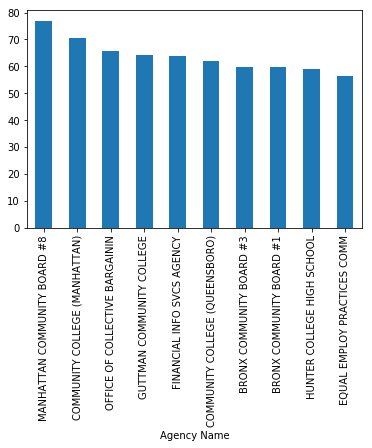

In [32]:
plt.show()

In [33]:
med_data_hours.nlargest(10).plot.bar()

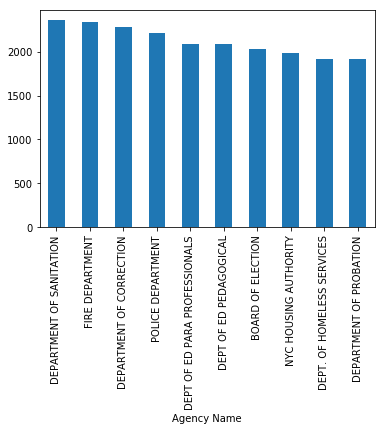

In [34]:
plt.show()

In [35]:
empl_per_dept.nlargest(10).plot.bar()

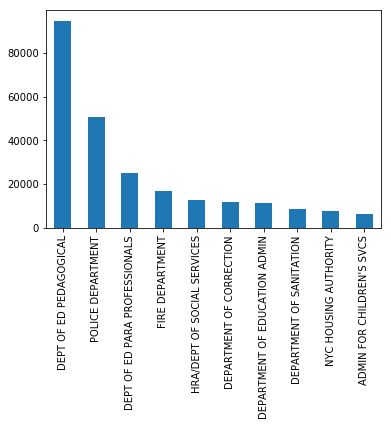

In [36]:
plt.show()

In [37]:
employ_location.nlargest(10).plot.bar()

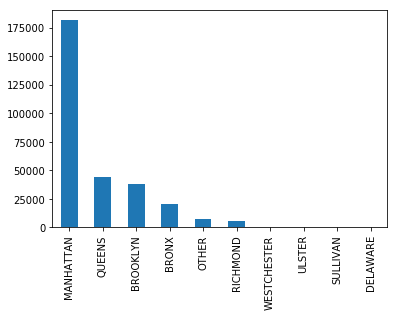

In [38]:
plt.show()

In [39]:
file_name = "clean_payroll_data.csv"

In [40]:
payroll.to_csv(file_name, index=False)

In [41]:
total_pr = payroll.groupby(['Agency Name'])['Base Salary'].sum()

In [42]:
total_pr.nlargest(10)

Agency Name
DEPT OF ED PEDAGOGICAL           8.616132e+09
POLICE DEPARTMENT                3.731862e+09
FIRE DEPARTMENT                  1.256503e+09
DEPT OF ED PARA PROFESSIONALS    9.107522e+08
DEPARTMENT OF CORRECTION         8.223181e+08
DEPARTMENT OF EDUCATION ADMIN    7.805363e+08
HRA/DEPT OF SOCIAL SERVICES      7.114376e+08
DEPARTMENT OF SANITATION         6.463121e+08
NYC HOUSING AUTHORITY            4.301047e+08
ADMIN FOR CHILDREN'S SVCS        4.256754e+08
Name: Base Salary, dtype: float64

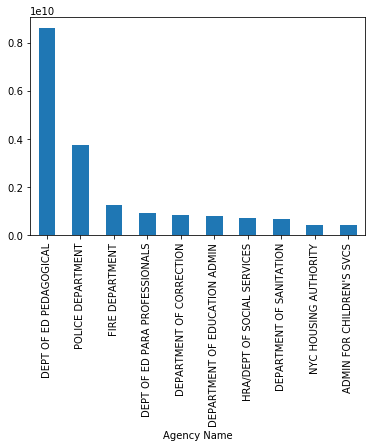

In [43]:
total_pr.nlargest(10).plot.bar()
plt.show()

Answers to my questions:
Based on my analysis, the means for the full time employees were heavily skewed by a few outliers. Judging by the differences between the mean and median, median tended to be the better metric to use to understand the total value and work done by city employees. As seen by the data, the highest median hourly pay went to the Manhattan Community Board #8. This board covers the Upper East Side and Roosevelt Island Areas. However, this seemed to be a challenging question to answer given the influence of outliers and would most likely need to scrubbed of those entries individually. What I found was that number of employees worked tended to conicide better with total payroll for the city. For both the dept of ed pedalogical had the highest numbers. For hours worked however, the department of sanitation had the most. Interestingly the differences between the top 10 departments was not relatively different, as compared to the other statistics calculated. Finally, we see that Manhattan has by far the most workers of any borough or surrounding county. This makes sense, given the massive infrastructure and population in Manhattan. I was surprised to see more workers in Queens or Brooklyn, however.


Challenges:

There are many challenges with work with a dataset, especially stemming from its size. For one, it was hard to catch many of the missing information, such as missing work location or the 0 entries for hours worked. This also made for some probable inaccuracies, since assuming the number of hours worked greatly changes the calculations. In addition, looking at the pay basis, it was hard to distinguish who a full-time employee was as the sheet included all interns, part-timers, etc. for the FY 2018. Finally, I also had challenges with the order in which I would have to clean the data. I found that switching the order could raise errors. 